# Tour & Travels Customer Churn Prediction

In [11]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics

## Data Extraction

In [12]:
churn  = pd.read_csv('Customertravel.csv')

In [13]:
churn.shape

(954, 7)

In [14]:
churn.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [15]:
churn.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [16]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


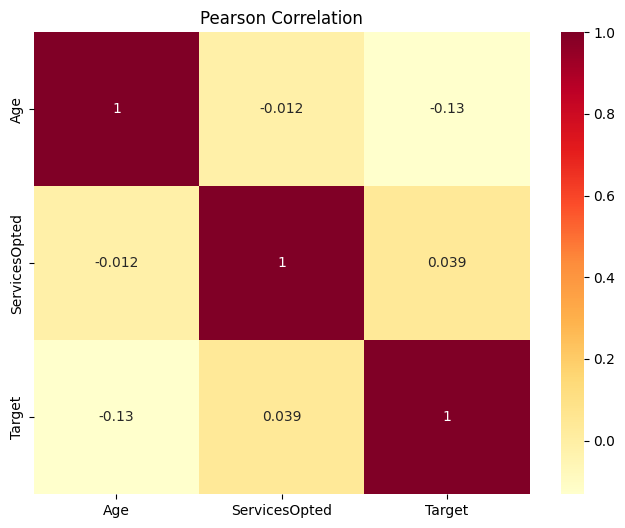

In [23]:
#heatmap correlation
plt.figure(figsize=(8,6))
sns.heatmap(churn.select_dtypes(include=['number']).corr(), annot=True, cmap='YlOrRd')
plt.title("Pearson Correlation")
plt.show()


In [20]:
#transform categorical variable
churn['FrequentFlyer'] = churn['FrequentFlyer'].astype('category')
churn['AnnualIncomeClass'] = churn['AnnualIncomeClass'].astype('category')
churn['AccountSyncedToSocialMedia'] = churn['AccountSyncedToSocialMedia'].astype('category')
churn['BookedHotelOrNot'] = churn['BookedHotelOrNot'].astype('category')
print(churn.dtypes)

Age                              int64
FrequentFlyer                 category
AnnualIncomeClass             category
ServicesOpted                    int64
AccountSyncedToSocialMedia    category
BookedHotelOrNot              category
Target                           int64
dtype: object


In [21]:
#handling categorical data
df = pd.DataFrame(churn)
df['FrequentFlyer'] = df['FrequentFlyer'].cat.codes
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].cat.codes
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].cat.codes
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].cat.codes
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


In [22]:
#split data
X = df.drop('Target', axis = 1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(667, 6)
(667,)
(287, 6)
(287,)


## Classification Model

In [24]:
#prepare models
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel = 'linear', gamma = 'auto', C = 5, probability = True),
    LinearSVC(),
    DecisionTreeClassifier(max_depth = 3),
    RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [30]:
#report models
log_cols=["Classifier", "Accuracy", "Log Loss"]
log_entries=[]


for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log_entries.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 86.7596%
Log Loss: 4.772330413890076


SVC
****Results****
Accuracy: 81.8815%
Log Loss: 6.530557408481156


LinearSVC
****Results****
Accuracy: 83.2753%
Log Loss: 6.028206838597991


DecisionTreeClassifier
****Results****
Accuracy: 84.6690%
Log Loss: 5.525856268714825




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
c:\Users\amlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RandomForestClassifier
****Results****
Accuracy: 86.7596%
Log Loss: 4.772330413890076


XGBClassifier
****Results****
Accuracy: 88.5017%
Log Loss: 4.144392201536118


AdaBoostClassifier
****Results****
Accuracy: 85.0174%
Log Loss: 5.400268626244033


GradientBoostingClassifier
****Results****
Accuracy: 88.1533%
Log Loss: 4.26997984400691


GaussianNB
****Results****
Accuracy: 79.0941%
Log Loss: 7.535258548247489


LinearDiscriminantAnalysis
****Results****
Accuracy: 83.2753%
Log Loss: 6.02820683859799


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 81.1847%
Log Loss: 6.7817326934227395




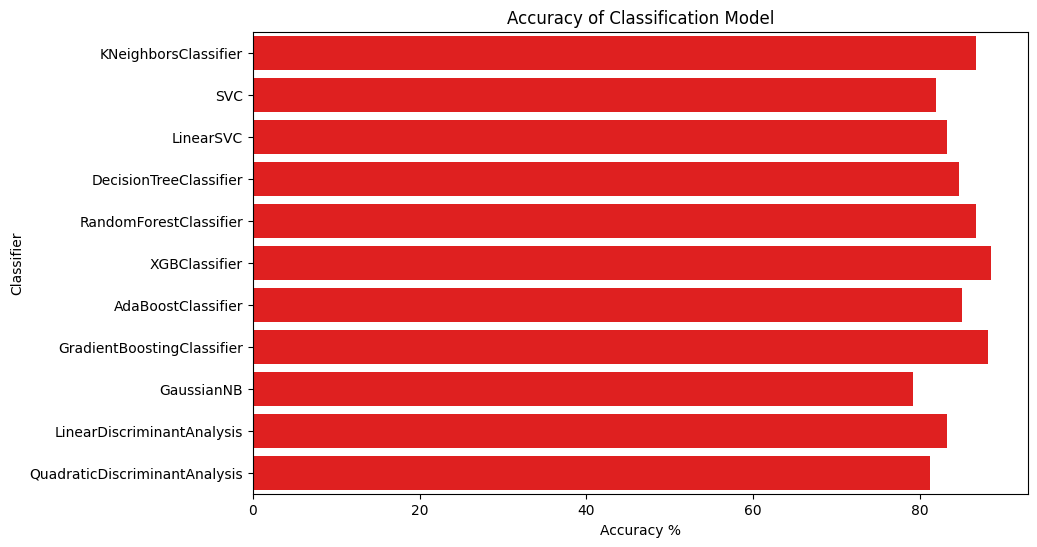

In [32]:
#visualize accuracy models
plt.figure(figsize = (10,6))
sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "red")
plt.xlabel('Accuracy %')
plt.title('Accuracy of Classification Model')
plt.show()
sns.set_color_codes("muted")
plt.show()

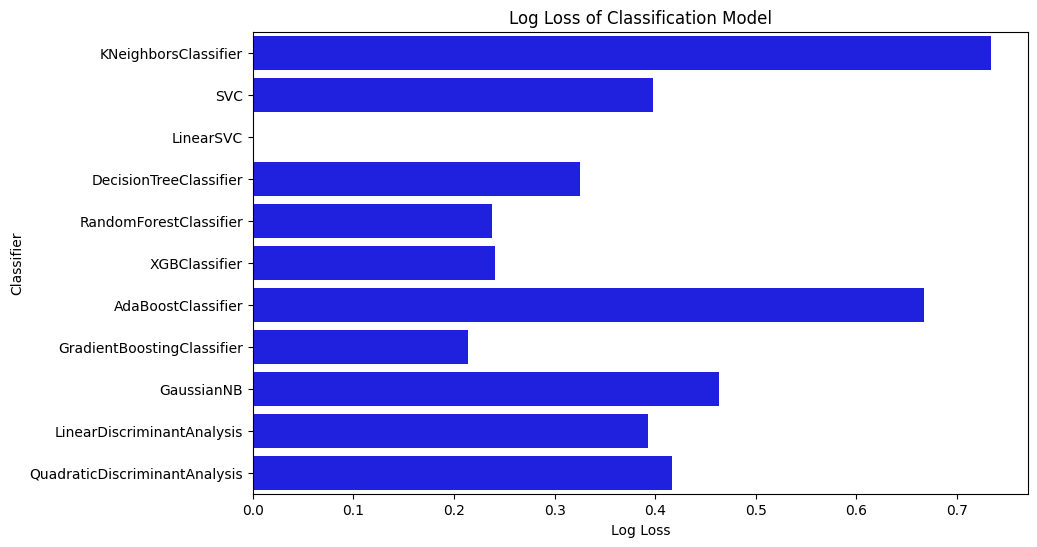

In [33]:
#visualize log loss models
plt.figure(figsize = (10,6))
sns.barplot(x = 'Log Loss', y = 'Classifier', data = log, color = "blue")
plt.xlabel('Log Loss')
plt.title('Log Loss of Classification Model')
plt.show()

### Extreme Gradient Boosting Model has the best score result

In [34]:
#build model
xgb = XGBClassifier()
%time xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

CPU times: total: 312 ms
Wall time: 41.3 ms


0.8850174216027874

In [35]:
#prediction
y_pred = xgb.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1]


In [36]:
#report of MSE & RMSE 
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE: '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE: '+ str(rmse))

MSE: 0.11498257839721254
RMSE: 0.33909081143141073


[[208  16]
 [ 17  46]]


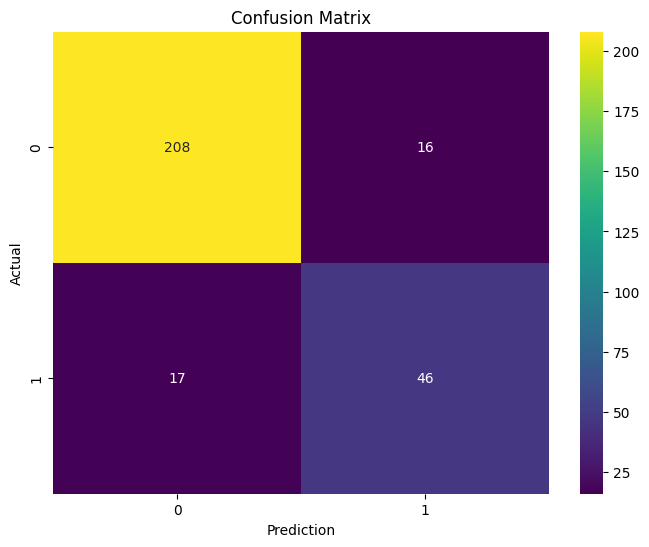

In [37]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [38]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       224
           1       0.74      0.73      0.74        63

    accuracy                           0.89       287
   macro avg       0.83      0.83      0.83       287
weighted avg       0.88      0.89      0.88       287



## Visualization

In [39]:
#transform Frequent Flyer
df.FrequentFlyer[df['FrequentFlyer'] == 0] = 'No'
df.FrequentFlyer[df['FrequentFlyer'] == 1] = 'Yes'
df.FrequentFlyer[df['FrequentFlyer'] == 2] = 'No Record'

#transform Annual Income Class
df.AnnualIncomeClass[df['AnnualIncomeClass'] == 0] = 'Low Income'
df.AnnualIncomeClass[df['AnnualIncomeClass'] == 1] = 'Middle Income'
df.AnnualIncomeClass[df['AnnualIncomeClass'] == 2] = 'High Income'

#transform Account Synced To Social Media
df.AccountSyncedToSocialMedia[df['AccountSyncedToSocialMedia'] == 0] = 'No'
df.AccountSyncedToSocialMedia[df['AccountSyncedToSocialMedia'] == 1] = 'Yes'

#transform Booked Hotel Or Not
df.BookedHotelOrNot[df['BookedHotelOrNot'] == 0] = 'No'
df.BookedHotelOrNot[df['BookedHotelOrNot'] == 1] = 'Yes'

#transform target
df.Target[df['Target'] == 0] = 'Customer Does Not Churn'
df.Target[df['Target'] == 1] = 'Customer Churn'
df.head()

C:\Users\amlan\AppData\Local\Temp\ipykernel_11696\1884240150.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.FrequentFlyer[df['FrequentFlyer'] == 0] = 'No'
C:\Users\amlan\AppData\Local\Temp\ipykernel_11696\1884240150.py:2: SettingWith

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,High Income,6,No,Yes,Customer Does Not Churn
1,34,No Record,Middle Income,5,Yes,No,Customer Churn
2,37,No,High Income,3,Yes,No,Customer Does Not Churn
3,30,No,High Income,2,No,No,Customer Does Not Churn
4,30,No,Middle Income,1,No,No,Customer Does Not Churn


C:\Users\amlan\AppData\Local\Temp\ipykernel_11696\2326197763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Target', y = 'Age', palette = 'Set1')


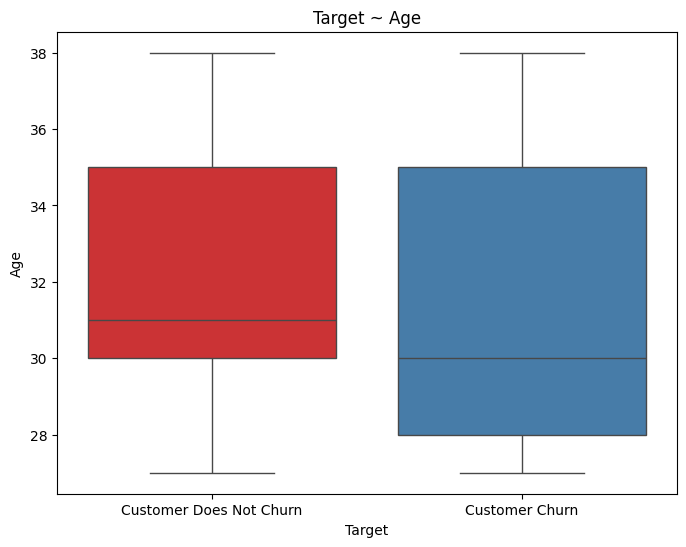

In [40]:
#visualize target ~ age
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Target', y = 'Age', palette = 'Set1')
plt.title("Target ~ Age")
plt.show()

In [41]:
#group frequent flyer & target
flyer_target = df.groupby(['Target', 'FrequentFlyer']).size().reset_index(name = 'Count')
print(flyer_target)

                    Target FrequentFlyer  Count
0           Customer Churn            No     69
1           Customer Churn     No Record    147
2           Customer Churn           Yes      8
3  Customer Does Not Churn            No    539
4  Customer Does Not Churn     No Record    139
5  Customer Does Not Churn           Yes     52


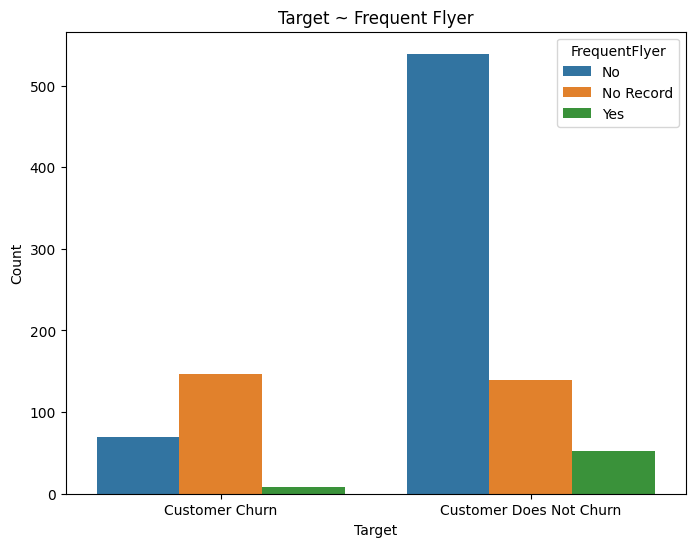

In [42]:
#visualize frequent flyer ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'FrequentFlyer', data = flyer_target)
plt.title("Target ~ Frequent Flyer")
plt.show()

In [43]:
#group annual income class & target
income_target = df.groupby(['Target', 'AnnualIncomeClass']).size().reset_index(name = 'Count')
print(income_target)

                    Target AnnualIncomeClass  Count
0           Customer Churn       High Income     28
1           Customer Churn        Low Income     92
2           Customer Churn     Middle Income    104
3  Customer Does Not Churn       High Income    381
4  Customer Does Not Churn        Low Income     67
5  Customer Does Not Churn     Middle Income    282


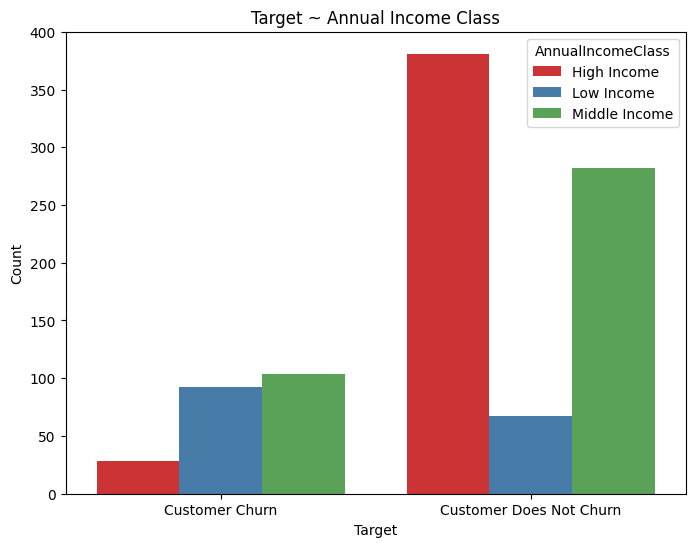

In [44]:
#visualize annual income class ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'AnnualIncomeClass', data = income_target, palette = 'Set1')
plt.title("Target ~ Annual Income Class")
plt.show()

C:\Users\amlan\AppData\Local\Temp\ipykernel_11696\3147401048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Target', y = 'ServicesOpted', palette = 'Set2')


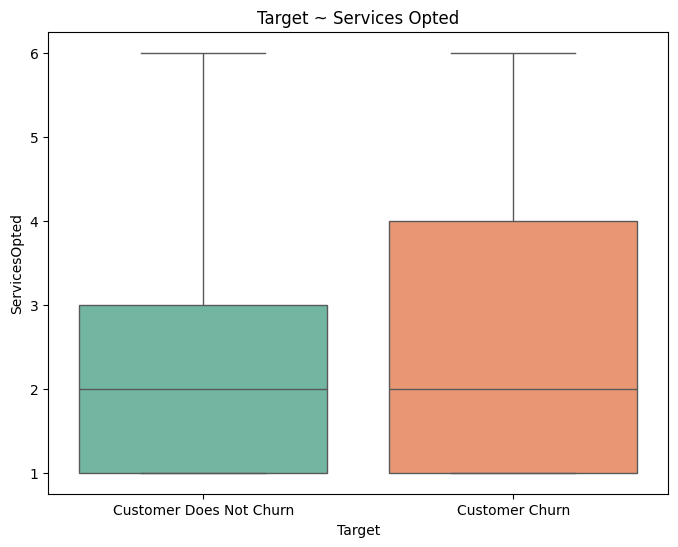

In [45]:
#visualize target ~ services opted
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Target', y = 'ServicesOpted', palette = 'Set2')
plt.title("Target ~ Services Opted")
plt.show()

In [46]:
#group account synced to social media ~ target
acc_target = df.groupby(['Target', 'AccountSyncedToSocialMedia']).size().reset_index(name = 'Count')
print(acc_target)

                    Target AccountSyncedToSocialMedia  Count
0           Customer Churn                         No    125
1           Customer Churn                        Yes     99
2  Customer Does Not Churn                         No    469
3  Customer Does Not Churn                        Yes    261


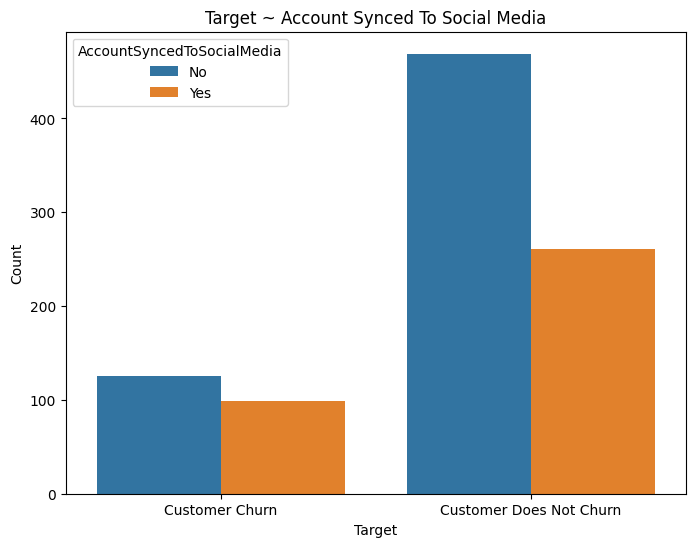

In [47]:
#visualize account synced to social media ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'AccountSyncedToSocialMedia', data = acc_target)
plt.title("Target ~ Account Synced To Social Media")
plt.show()

In [48]:
#group booked hotel or not & target
book_target = df.groupby(['Target', 'BookedHotelOrNot']).size().reset_index(name = 'Count')
print(book_target)

                    Target BookedHotelOrNot  Count
0           Customer Churn               No    176
1           Customer Churn              Yes     48
2  Customer Does Not Churn               No    400
3  Customer Does Not Churn              Yes    330


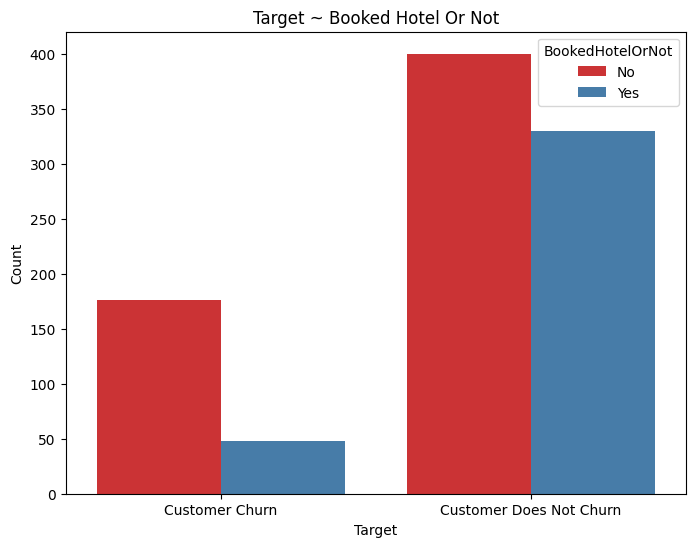

In [49]:
#visualize booked hotel or not ~ target
plt.figure(figsize = (8,6))
sns.barplot(x = 'Target', y = 'Count', hue = 'BookedHotelOrNot', data = book_target, palette = 'Set1')
plt.title("Target ~ Booked Hotel Or Not")
plt.show()

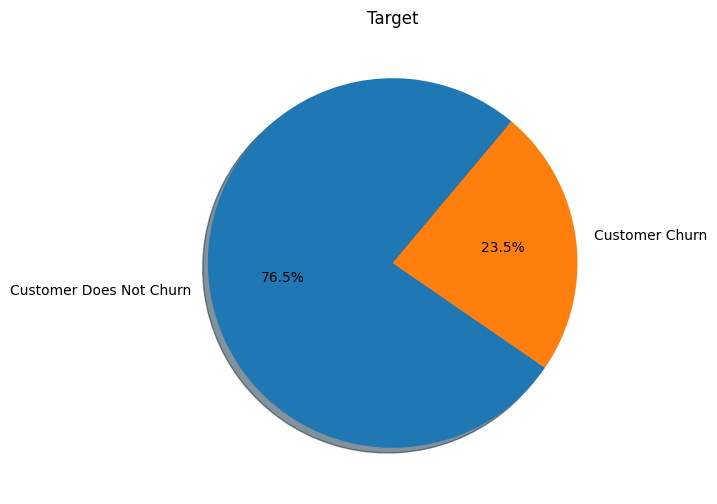

In [50]:
#visualize Target
plt.figure(figsize = (8,6))
x = [np.count_nonzero(df['Target'] == 'Customer Does Not Churn'),
    np.count_nonzero(df['Target'] == 'Customer Churn')]
activities = ['Customer Does Not Churn', 'Customer Churn']
plt.pie(x, labels = activities, startangle = 50, autopct = '%.1f%%', shadow = True)
plt.title("Target")
plt.show()